In [6]:
import numpy
import matplotlib.pyplot as plt
from matplotlib import animation
import os

%matplotlib notebook

In [7]:
config_path = 'config.json'
output_path = 'output.xyz'
data_path = 'data.txt'

In [32]:
# os.system('cd /mnt/d/mipt_edu/3sem/horizons')
# os.system(f'./build/main {config_path} {output_path} {data_path}')

<IPython.core.display.Javascript object>


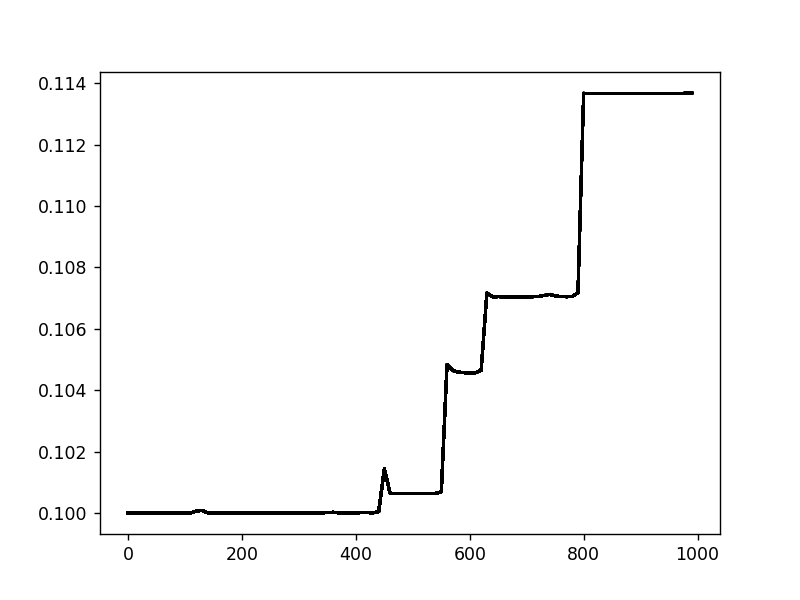

In [36]:
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)

def update_plot(i):
    # Здесь вы можете загрузить данные из файла
    with open('data.txt', 'r') as file:
        lines = file.read().splitlines()
        x = [float(line.split()[0]) for line in lines]
        y = [float(line.split()[1]) for line in lines]

    ax.plot(x, y, color='black')


ani = animation.FuncAnimation(fig, update_plot, interval=100)
plt.show()